In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://gist.githubusercontent.com/DiogoRibeiro7/c6590d0cf119e87c39e31c21a9c0f3a8/raw/4a8e3da267a0c1f0d650901d8295a5153bde8b21/PlayTennis.csv'
df = pd.read_csv(url)
df.rename(columns={'Play Tennis':'Play'}, inplace=True)
# df.columns
df

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [2]:
df.dtypes

Outlook        object
Temperature    object
Humidity       object
Wind           object
Play           object
dtype: object

In [3]:
df.Play.unique()

array(['No', 'Yes'], dtype=object)

In [4]:
df.groupby('Play').count()

,Outlook,Temperature,Humidity,Wind
Play,,,,
No,5,5,5,5
Yes,9,9,9,9


In [5]:
df.isnull().sum()

Outlook        0
Temperature    0
Humidity       0
Wind           0
Play           0
dtype: int64

In [6]:
X = df.iloc[:, :-1] # X = df.drop(columns='Play', axis=1)
y = df.Play # with no LabelEncoder
# try train ( autually, should labelEncode first )
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
# model.fit(X, y) # Error chouldn't convert string to float ( X, )
# y can be string

In [7]:
# Labeling
from sklearn.preprocessing import LabelEncoder

# Label X
def labelEncode(data, columns):
   for col in columns:
        lb = LabelEncoder().fit_transform(data[col])
        data[col + '_' + 'code'] = lb
cols = ['Outlook', 'Temperature', 'Humidity', 'Wind']
labelEncode(df, cols)

# Label y
df['Play_code'] = LabelEncoder().fit_transform(df.Play)

# show output ..._code
df

,Outlook,Temperature,Humidity,Wind,Play,Outlook_code,Temperature_code,Humidity_code,Wind_code,Play_code
0,Sunny,Hot,High,Weak,No,2,1,0,1,0
1,Sunny,Hot,High,Strong,No,2,1,0,0,0
2,Overcast,Hot,High,Weak,Yes,0,1,0,1,1
3,Rain,Mild,High,Weak,Yes,1,2,0,1,1
4,Rain,Cool,Normal,Weak,Yes,1,0,1,1,1
5,Rain,Cool,Normal,Strong,No,1,0,1,0,0
6,Overcast,Cool,Normal,Strong,Yes,0,0,1,0,1
7,Sunny,Mild,High,Weak,No,2,2,0,1,0
8,Sunny,Cool,Normal,Weak,Yes,2,0,1,1,1
9,Rain,Mild,Normal,Weak,Yes,1,2,1,1,1


In [8]:
X = df.iloc[:, 5:-1]
X # or X_train

,Outlook_code,Temperature_code,Humidity_code,Wind_code
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [9]:
y = df.Play_code
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play_code, dtype: int64

In [10]:
model.fit(X, y)

DecisionTreeClassifier()

In [11]:
y_label = LabelEncoder()
y_label.fit_transform(df.Play)
list(y_label.classes_)

['No', 'Yes']

In [12]:
# or just 
class_names = list(df.Play.unique())
class_names

['No', 'Yes']

In [13]:
x_predict = [[1,2,0,0]]
y_predict = model.predict(X=x_predict)
# y_predict[0]  # yes = 1, no = 0
prd = class_names[y_predict[0]]
# prd
print(f"data x : {x_predict[0]} , predict : {prd}")

data x : [1, 2, 0, 0] , predict : No


/Users/rio/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Diagram Graph

In [14]:
class_names

['No', 'Yes']

In [33]:
# !pip install pydotplus

In [35]:
data_feature_names = cols 

import pydotplus
from sklearn.tree import export_graphviz
from  IPython.display import Image
class_names = ['No play', 'Play']
dot_data = export_graphviz(model,
                          out_file=None,
                          feature_names=data_feature_names,
                          class_names=class_names,
                          filled=True,
                          rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

InvocationException: GraphViz's executables not found

# Evaluate Model accuracy

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4)

In [17]:
print('Total X: {}'. format(len(X)))
print('Total train: {}'. format(len(X_train)))
print('Total test: {}'. format(len(X_test)))
X_test # get by random accession

Total X: 14
Total train: 8
Total test: 6


,Outlook_code,Temperature_code,Humidity_code,Wind_code
13,1,2,0,0
5,1,0,1,0
1,2,1,0,0
2,0,1,0,1
0,2,1,0,1
12,0,1,1,1


In [18]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
# y from prediction
y_predict # 3 value means 3 y_test by random accessing

array([1, 1, 0, 1, 0, 1])

In [19]:
y_test.values # real y-values

array([0, 0, 0, 1, 0, 1])

In [20]:
print('Accuracy %: {}'. format(
    accuracy_score(y_test, y_predict) * 100))

Accuracy %: 66.66666666666666


In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_true=y_test, y_pred=y_predict, 
                           target_names=class_names))
cm = confusion_matrix(y_test, y_predict)
print(cm)
# cm

              precision    recall  f1-score   support

          No       1.00      0.50      0.67         4
         Yes       0.50      1.00      0.67         2

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6

[[2 2]
 [0 2]]


In [22]:
TN = cm[0,0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]
TN, FP, FN, TP

(2, 2, 0, 2)

In [23]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.50      1.00      0.67         2

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6



# Heatmap Confusion Matrix

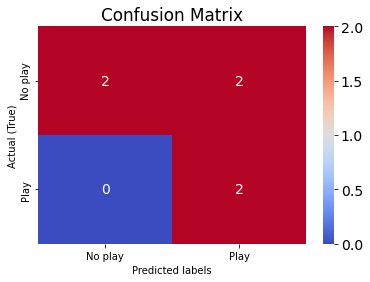

In [24]:
ax = plt.subplot()

plt.rcParams['figure.figsize'] =5,4
plt.rcParams.update({'font.size':14})

cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, ax=ax, cmap='coolwarm', )

y_targets = ['No play', 'Play']

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual (True)')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(y_targets)
ax.yaxis.set_ticklabels(y_targets)

plt.show()

In [25]:
y_test

13    0
5     0
1     0
2     1
0     0
12    1
Name: Play_code, dtype: int64

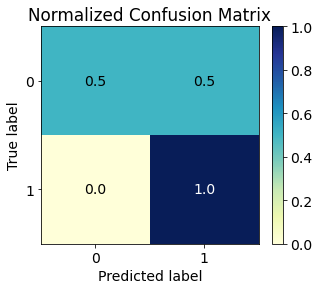

In [26]:
import scikitplot as skplot
skplot.metrics.plot_confusion_matrix(y_test, y_predict,
                                    cmap='YlGnBu',
                                    normalize=True) # rescale colorbar to be [0 -> 1]
plt.show()

# K-fold Cross-validation

In [27]:
# k = 5
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [28]:
for train_ind, test_ind in kf.split(X):
    print(train_ind, test_ind)

[ 3  4  5  6  7  8  9 10 11 12 13] [0 1 2]
[ 0  1  2  6  7  8  9 10 11 12 13] [3 4 5]
[ 0  1  2  3  4  5  9 10 11 12 13] [6 7 8]
[ 0  1  2  3  4  5  6  7  8 12 13] [ 9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11] [12 13]


In [29]:
def printNFold(n):
    kf = KFold(n_splits=n)
    for train_ind, test_ind in kf.split(X):
        print(train_ind, test_ind)
print('n_sample : {}'. format(len(X)))
printNFold(14)

n_sample : 14
[ 1  2  3  4  5  6  7  8  9 10 11 12 13] [0]
[ 0  2  3  4  5  6  7  8  9 10 11 12 13] [1]
[ 0  1  3  4  5  6  7  8  9 10 11 12 13] [2]
[ 0  1  2  4  5  6  7  8  9 10 11 12 13] [3]
[ 0  1  2  3  5  6  7  8  9 10 11 12 13] [4]
[ 0  1  2  3  4  6  7  8  9 10 11 12 13] [5]
[ 0  1  2  3  4  5  7  8  9 10 11 12 13] [6]
[ 0  1  2  3  4  5  6  8  9 10 11 12 13] [7]
[ 0  1  2  3  4  5  6  7  9 10 11 12 13] [8]
[ 0  1  2  3  4  5  6  7  8 10 11 12 13] [9]
[ 0  1  2  3  4  5  6  7  8  9 11 12 13] [10]
[ 0  1  2  3  4  5  6  7  8  9 10 12 13] [11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 13] [12]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12] [13]


In [30]:
from sklearn.model_selection import cross_val_score

model_temp = DecisionTreeClassifier()
cvs = cross_val_score(model, X, y, cv=4) # k = 4 folds so n_test = (1/4) * n_train
# splits 75: 25 then.
# efficiacy of each round
# cvs 

cvs.mean().round(4) * 100 # effeciancy

85.42